In [1]:
import numpy as np
import matplotlib.pyplot as plt

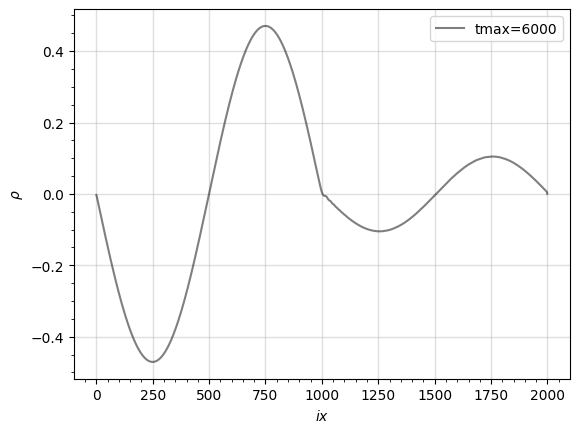

In [5]:
Densidades1000 = np.genfromtxt('ondas.dat', delimiter=' ', usecols=(0, 1))
##Densidades2000 = np.genfromtxt('Punto 1_2000t.dat', delimiter=' ', usecols=(0, 1))

plt.plot(Densidades1000[:,0],Densidades1000[:,1],'-', color='Black', alpha=0.5, label='tmax=6000')
plt.xlabel(r'$ix$')
plt.ylabel(r'$\rho$')
plt.grid(color='#c0c0c0', linewidth=1,alpha=0.5)
plt.minorticks_on()
plt.legend()
plt.show()

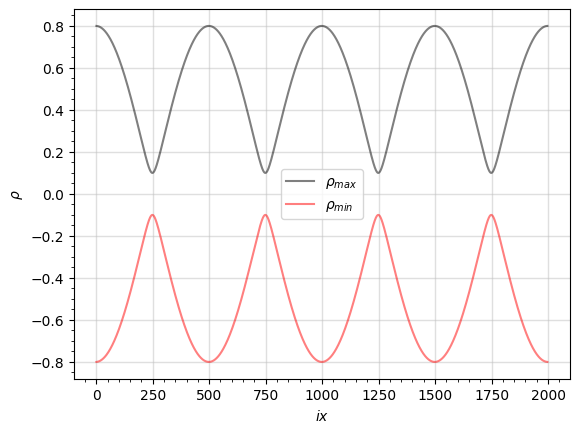

In [3]:
Rhomax = np.genfromtxt('Rhomax.dat', delimiter=' ', usecols=(0, 1))
Rhomin = np.genfromtxt('Rhomin.dat', delimiter=' ', usecols=(0, 1))

plt.plot(Rhomax[1:-2,0],Rhomax[1:-2,1],'-', color='Black', alpha=0.5, label=r'$\rho_{max}$')
plt.plot(Rhomin[1:-2,0],Rhomin[1:-2,1],'-', color='Red', alpha=0.5, label=r'$\rho_{min}$')
plt.xlabel(r'$ix$')
plt.ylabel(r'$\rho$')
plt.grid(color='#c0c0c0', linewidth=1,alpha=0.5)
plt.minorticks_on()
plt.legend()
plt.show()

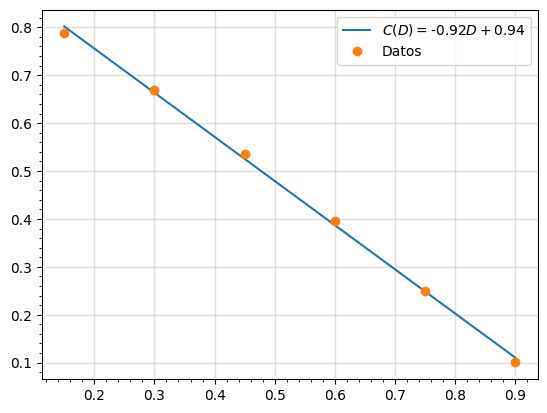

In [4]:
def C_absorcion(x):
    Amax = np.max(x[1:-2])
    Amin = np.min(x[1:-2])
    SWR = Amax/Amin
    C = (4*SWR)/((SWR+1)**2)

    return C

d = np.array((0.15, 0.3, 0.45, 0.6, 0.75, 0.9))

D_015=np.genfromtxt('D_0.15.dat', delimiter=' ', usecols=(1))
D_03=np.genfromtxt('D_0.3.dat', delimiter=' ', usecols=(1))
D_045=np.genfromtxt('D_0.45.dat', delimiter=' ', usecols=(1))
D_06=np.genfromtxt('D_0.6.dat', delimiter=' ', usecols=(1))
D_075=np.genfromtxt('D_0.75.dat', delimiter=' ', usecols=(1))
D_09=np.genfromtxt('D_0.9.dat', delimiter=' ', usecols=(1))

c = np.array((C_absorcion(D_015), C_absorcion(D_03), C_absorcion(D_045), C_absorcion(D_06), C_absorcion(D_075), C_absorcion(D_09), ))

# Realizar regresión lineal
z = np.polyfit(d, c, 1) # 1 es el grado de la regresión (lineal)
p = np.poly1d(z)

pendiente = z[0]
punto_corte = z[1]


# Plotear la regresión lineal
xp = np.linspace(d.min(), d.max(), 100)
plt.plot(xp, p(xp), "-", label=r'$C(D)=$'f'{pendiente:.2f}'r'$D+$'f'{punto_corte:.2f}')

# Plotear los puntos originales
plt.plot(d, c, 'o', label="Datos")

plt.grid(color='#c0c0c0', linewidth=1,alpha=0.5)
plt.minorticks_on()
plt.legend()
plt.show()



